In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline

### load data ###

In [2]:
df_f = pd.read_csv('flights_clean.csv')
df_f.drop(['Year','DepTime','CRSDepTime','ArrTime','CRSArrTime'],axis=1, inplace=True)
df_f.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,3,4,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,1,3,4,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,1,3,4,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,1,3,4,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,1,3,4,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [3]:
df_f.shape

(1928366, 13)

In [4]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928366 entries, 0 to 1928365
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   UniqueCarrier      object 
 4   FlightNum          int64  
 5   TailNum            object 
 6   ActualElapsedTime  float64
 7   CRSElapsedTime     float64
 8   ArrDelay           float64
 9   DepDelay           float64
 10  Origin             object 
 11  Dest               object 
 12  Distance           int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 191.3+ MB


In [5]:
# convert FlightNum to object type
df_f['FlightNum'] = df_f['FlightNum'].astype('str')

In [6]:
# convert Month to object type
months={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

df_f['Month']=df_f['Month'].map(months)

In [7]:
display(df_f['DayOfWeek'].unique())

array([4, 5, 6, 7, 1, 2, 3])

In [8]:
# convert DayOfWeek to object type
week={1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}

df_f['DayOfWeek']=df_f['DayOfWeek'].map(week)

In [9]:
df_f.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,Jan,3,Thu,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,Jan,3,Thu,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,Jan,3,Thu,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,Jan,3,Thu,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,Jan,3,Thu,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


### abans de processar les dades:
+ vaig a quedarme nomes amb vols de 40 min o mes de durada
+ vaig a quedarme amb aeroports d'Origen o Desti que apareguin mes de 50 vegades

In [10]:
flights = df_f[df_f['ActualElapsedTime']>=40]

In [11]:
flights.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,Jan,3,Thu,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,Jan,3,Thu,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,Jan,3,Thu,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,Jan,3,Thu,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,Jan,3,Thu,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [12]:
origin_freq = flights['Origin'].value_counts()

In [13]:
origin_airports = origin_freq[origin_freq > 50].index
origin_airports

Index(['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'LAS', 'EWR', 'DTW',
       ...
       'SCE', 'LYH', 'OXR', 'DLG', 'CDC', 'PSG', 'BTM', 'YKM', 'ADK', 'TEX'],
      dtype='object', length=281)

In [14]:
flights_1 = flights.loc[flights['Origin'].isin(origin_airports)] 

In [15]:
flights_1.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,Jan,3,Thu,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,Jan,3,Thu,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,Jan,3,Thu,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,Jan,3,Thu,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,Jan,3,Thu,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [16]:
dest_freq = flights_1['Dest'].value_counts()

In [17]:
dest_airports = dest_freq[dest_freq > 50].index
dest_airports

Index(['ORD', 'ATL', 'DFW', 'DEN', 'LAX', 'EWR', 'LAS', 'PHX', 'SFO', 'IAH',
       ...
       'IYK', 'ADQ', 'WRG', 'BTM', 'CDC', 'LWS', 'RFD', 'SLE', 'ALO', 'PLN'],
      dtype='object', length=280)

In [18]:
flights_2 = flights_1.loc[flights_1['Dest'].isin(dest_airports)] 

In [19]:
flights_2.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,Jan,3,Thu,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,Jan,3,Thu,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,Jan,3,Thu,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,Jan,3,Thu,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,Jan,3,Thu,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [20]:
flights_2['Origin'].value_counts()

ATL    130814
ORD    124195
DFW     94597
DEN     73439
LAX     58071
        ...  
PSG        59
BTM        58
YKM        55
ADK        53
TEX        52
Name: Origin, Length: 281, dtype: int64

### Nivell 1

- Exercici 1

Classifica els diferents vols utilitzant l'algorisme de K-means.

1. Vaig a utilitzar la funció get_dummies per encodejar el Mes i el dia del Mes

In [21]:
months_week = pd.get_dummies(flights_2[['Month','DayOfWeek']],prefix='',prefix_sep='')

In [22]:
months_week.head(2)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


2. els dies del mes i la resta de columnas numeriques les deixaré igual per ara
3. vaig a mirar les columnes que no son numeriques

In [23]:
categorical_cols = flights_2[['UniqueCarrier','TailNum','Origin','Dest']]

In [24]:
categorical_cols.head()

,UniqueCarrier,TailNum,Origin,Dest
0,WN,N712SW,IAD,TPA
1,WN,N772SW,IAD,TPA
2,WN,N428WN,IND,BWI
3,WN,N464WN,IND,BWI
4,WN,N726SW,IND,JAX


In [25]:
categorical_cols.nunique()

UniqueCarrier      20
TailNum          5360
Origin            281
Dest              280
dtype: int64

+ hi han 20 UniqueCarrrier i al voltant de 300 diferents aeroports d'Origen i/o de Desti i 5360 TailNum diferents

In [26]:
categorical_cols['UniqueCarrier'].unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

4. vaig a utilitzar get_dummies per encodejar els UniqueCarrier ja que no surten masses columnes

In [27]:
carriers = pd.get_dummies(flights_2['UniqueCarrier'])

In [28]:
carriers.head(2)

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


5. La resta de variables categoriques utilitzare LabelEncoder

In [29]:
# creem LabelEncoder per les variables categoriques
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
categoricals_transform = categorical_cols.drop(['UniqueCarrier'],axis=1)
categoricals_transform = categoricals_transform[['Origin','Dest','TailNum']].apply(le.fit_transform)

In [33]:
categoricals_transform.head()

,Origin,Dest,TailNum
0,126,265,3756
1,126,265,4116
2,131,42,1948
3,131,42,2129
4,131,137,3839


6. columnes numeriques

In [34]:
numeric_cols = flights_2[['DayofMonth','ActualElapsedTime','ArrDelay','DepDelay','Distance']]

In [35]:
numeric_cols.head(2)

,DayofMonth,ActualElapsedTime,ArrDelay,DepDelay,Distance
0,3,128.0,-14.0,8.0,810
1,3,128.0,2.0,19.0,810


7. unifiquem totes les dades en un unic dataframe

In [36]:
dfa = pd.concat([numeric_cols,categoricals_transform,months_week,carriers],axis=1)

In [37]:
dfa.head()

,DayofMonth,ActualElapsedTime,ArrDelay,DepDelay,Distance,Origin,Dest,TailNum,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,3,128.0,-14.0,8.0,810,126,265,3756,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,128.0,2.0,19.0,810,126,265,4116,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,96.0,14.0,8.0,515,131,42,1948,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,90.0,34.0,34.0,515,131,42,2129,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,101.0,11.0,25.0,688,131,137,3839,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


8. aplico una Normalització de les variables numeriques

In [41]:
#from sklearn.preprocessing import StandardScaler

In [55]:
cols2norm=['DayofMonth','ActualElapsedTime','ArrDelay','DepDelay','Distance','Origin','Dest','TailNum']

In [56]:
res = dfa.drop(cols2norm,axis=1)
numerical = dfa[cols2norm]

In [42]:
from scipy.cluster.vq import whiten

In [59]:
X1 = pd.DataFrame(whiten(numerical),columns=numerical.columns,index= numerical.index)

In [60]:
X1.describe().round(2)
# totes tenen std = 1

,DayofMonth,ActualElapsedTime,ArrDelay,DepDelay,Distance,Origin,Dest,TailNum
count,1910630.00,1910630.00,1910630.00,1910630.00,1910630.00,1910630.00,1910630.00,1910630.00
mean,1.79,1.87,0.74,0.81,1.35,1.80,1.82,1.78
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.11,0.56,-1.92,0.11,0.02,0.00,0.00,0.00
25%,0.91,1.13,0.16,0.23,0.60,0.97,0.96,0.93
50%,1.82,1.63,0.44,0.45,1.07,1.90,1.90,1.73
75%,2.62,2.30,0.98,0.99,1.75,2.61,2.63,2.61
max,3.53,15.52,43.28,46.27,8.66,3.70,3.66,3.51


In [61]:
X_features = pd.concat([X1,res],axis=1)

In [62]:
X_features.head()

,DayofMonth,ActualElapsedTime,ArrDelay,DepDelay,Distance,Origin,Dest,TailNum,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0.341798,1.783049,-0.246220,0.150046,1.413660,1.666484,3.478373,2.461231,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.341798,1.783049,0.035174,0.356360,1.413660,1.666484,3.478373,2.697132,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.341798,1.337286,0.246220,0.150046,0.898808,1.732614,0.551289,1.276485,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.341798,1.253706,0.597963,0.637697,0.898808,1.732614,0.551289,1.395091,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.341798,1.406937,0.193459,0.468895,1.200738,1.732614,1.798253,2.515619,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


+ anem a aplicar un PCA per quedarnos amb 3 components principals i veure la variancia 

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_features)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.18786165 0.18238375 0.1024069 ]


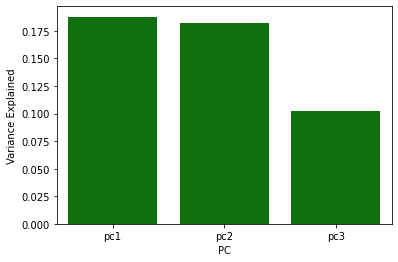

In [64]:
pca_df = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_,
             'PC':['pc1','pc2','pc3']})

sns.barplot(x='PC',y='Variance Explained', data=pca_df, color="green")
plt.show()

In [65]:
pca_df.head()

,Variance Explained,PC
0,0.187862,pc1
1,0.182384,pc2
2,0.102407,pc3


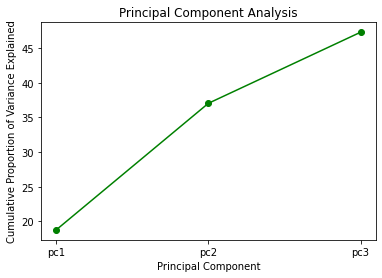

In [66]:
plt.plot(100*np.cumsum(pca.explained_variance_ratio_),marker = 'o',color='green')
plt.xticks(np.arange(3),['pc1','pc2','pc3'])
plt.title('Principal Component Analysis')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

In [67]:
round(np.cumsum(pca.explained_variance_ratio_)[-1]*100,1)

47.3

+ els 3 primers components representen el 47% de la variança de les dades

In [68]:
X_features['pca1'] = principalComponents[:,0]
X_features['pca2'] = principalComponents[:,1] 
X_features['pca3'] = principalComponents[:,2]

+ anem a visualitzar el resultats

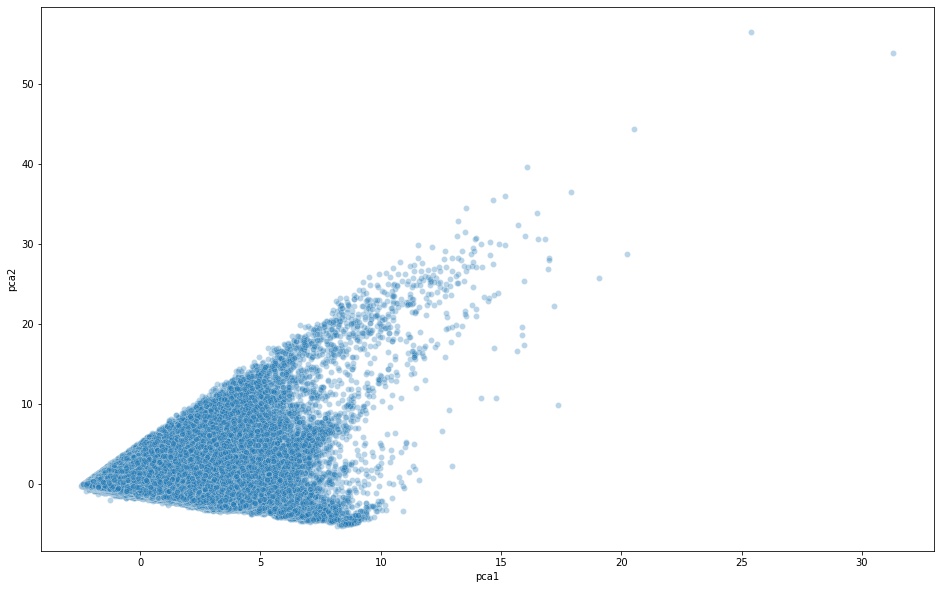

In [70]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="pca1", y="pca2", data=X_features, alpha=0.3)
plt.show()

+ de la grafica veiem que si visualitzem nomes els primers 2 components no podem veure cap cluster/grups

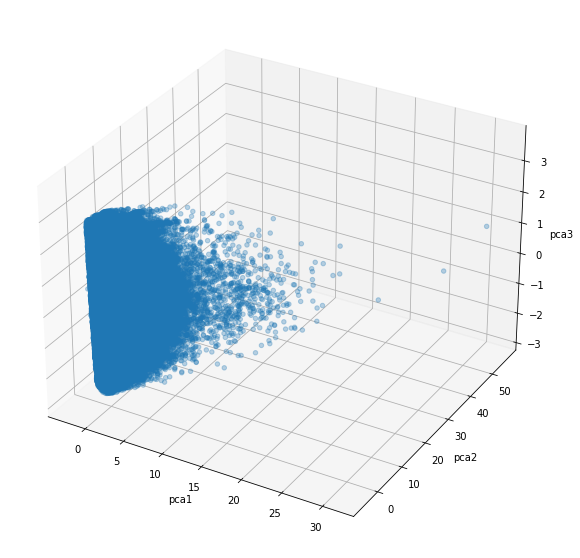

In [71]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=X_features["pca1"],ys=X_features["pca2"], zs=X_features["pca3"],alpha=0.3)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

+ de la grafica en 3D veiem que si visualitzem els primers 3 components tampoc es pot veure clarament les diferents agrupacions/clusters. 

+ apliquem l'algorisme de K-means

In [72]:
from sklearn.cluster import KMeans

In [73]:
n_clusters = np.arange(1,10)
inercias = []
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300}
for cluster in n_clusters:    
    knn = KMeans(n_clusters=cluster,**kmeans_kwargs,random_state=123)
    knn.fit(X_features[['pca1','pca2','pca3']])
    err = knn.inertia_
    print(cluster,err)
    inercias.append(err)


1 9647528.743001124
2 7118970.084754744
3 5096524.445804106
4 3939582.9703573836
5 3429974.1099351435
6 2950964.8092443
7 2720079.424319074
8 2502093.273578938
9 2329692.522309753


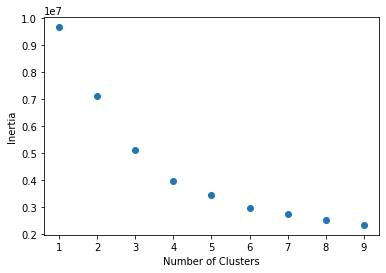

In [74]:
# Elbow plot #
plt.scatter(n_clusters,inercias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [75]:
# A partir del plot "elbow" podriem dir que existeixen 4 clusters

### Nivell 2

- Exercici 2

Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [ ]:
from scipy.cluster.hierarchy as linkage,fcluster,dendrogram


In [ ]:
df = X_features.drop(['pc1','pc2','pc3'],axis=1)

In [ ]:
Z = linkage(df,method='ward')
df['cluster_labels'] = fcluster(Z,3,criterion='maxclust')
sns.scatterplot(x='',y='',hue='cluster_labels',data=df)


In [ ]:
# Create dendrogram
dendro = dendrogram(Z)
plt.show()

### Nivell3

- Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

'The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

    How close the data point is to other points in the cluster
    How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters. 
'

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)


In [ ]:
# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
